# Import libraries 

In [2]:
import pandas as pd
import numpy as np

import os
from datetime import datetime
import pandas_datareader.data as web

# Visualisation
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("seaborn-colorblind")

from pandas_datareader import data as web
from pandas import Series, DataFrame
import datetime
from operator import itemgetter
from datetime import datetime
from datetime import datetime, timedelta

import statsmodels.api as sm

# Accessing yahoo finance historical currency exchange data 

In [2]:
gbpusd = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2000, 1, 1), # using yahoo finance api
                   end=datetime(2022, 10, 31),
                   )

gbpusd['Currency'] = 'GBP'
gbpusd 

,High,Low,Open,Close,Volume,Adj Close,Currency
Date,,,,,,,
2003-12-01,1.727205,1.718390,1.723811,1.718597,0.0,1.718597,GBP
2003-12-02,1.732112,1.717298,1.719010,1.730313,0.0,1.730313,GBP
2003-12-03,1.731812,1.725209,1.730493,1.728101,0.0,1.728101,GBP
2003-12-04,1.728997,1.718302,1.727414,1.720697,0.0,1.720697,GBP
2003-12-05,1.733102,1.719809,1.720608,1.733102,0.0,1.733102,GBP
...,...,...,...,...,...,...,...
2022-10-25,1.162358,1.143419,1.146066,1.146224,0.0,1.146224,GBP
2022-10-26,1.164415,1.155095,1.163345,1.163819,0.0,1.163819,GBP
2022-10-27,1.160012,1.150616,1.156738,1.156604,0.0,1.156604,GBP


In [4]:
gbpjpy = web.DataReader("GBPJPY=X", "yahoo", start=datetime(2000, 1, 1),
                   end=datetime(2022, 10, 31),
                   )

gbpjpy['Currency'] = 'JPY'
gbpjpy

,High,Low,Open,Close,Volume,Adj Close,Currency
Date,,,,,,,
2003-12-01,189.660004,187.740005,189.330002,187.630005,0.0,187.630005,JPY
2003-12-02,188.809998,187.559998,187.669998,188.009995,0.0,188.009995,JPY
2003-12-03,188.240005,186.490005,188.020004,187.089996,0.0,187.089996,JPY
2003-12-04,187.029999,185.899994,187.029999,186.220001,0.0,186.220001,JPY
2003-12-05,186.740005,185.830002,186.190002,185.880005,0.0,185.880005,JPY
...,...,...,...,...,...,...,...
2022-10-25,170.582993,169.356995,169.598999,169.598999,0.0,169.598999,JPY
2022-10-26,170.031006,168.759995,170.052002,170.052002,0.0,170.052002,JPY
2022-10-27,171.044998,168.899994,169.132004,169.132004,0.0,169.132004,JPY


In [6]:
gbp_brexit = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2015, 1, 1),
                   end=datetime(2022, 10, 31),
                   )

gbp_brexit

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,1.558094,1.558094,1.558094,1.558094,0.0,1.558094
2015-01-02,1.558458,1.538746,1.558021,1.557972,0.0,1.557972
2015-01-05,1.532004,1.520612,1.528608,1.528491,0.0,1.528491
2015-01-06,1.527370,1.515795,1.525832,1.525832,0.0,1.525832
2015-01-07,1.515611,1.506796,1.513638,1.513798,0.0,1.513798
...,...,...,...,...,...,...
2022-10-25,1.162358,1.143419,1.146066,1.146224,0.0,1.146224
2022-10-26,1.164415,1.155095,1.163345,1.163819,0.0,1.163819
2022-10-27,1.160012,1.150616,1.156738,1.156604,0.0,1.156604


In [7]:
gbp_brexit.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

# Seasonal decomposition 

In [ ]:
# The Seasonal Decomposition procedure decomposes a series into a seasonal component, a combined trend and 
# cycle component, and an "error" component. The procedure is an implementation of the Census Method I, 
# otherwise known as the ratio-to-moving-average method.

The mean of GBP/USD exchange is:  1.5584569289916899


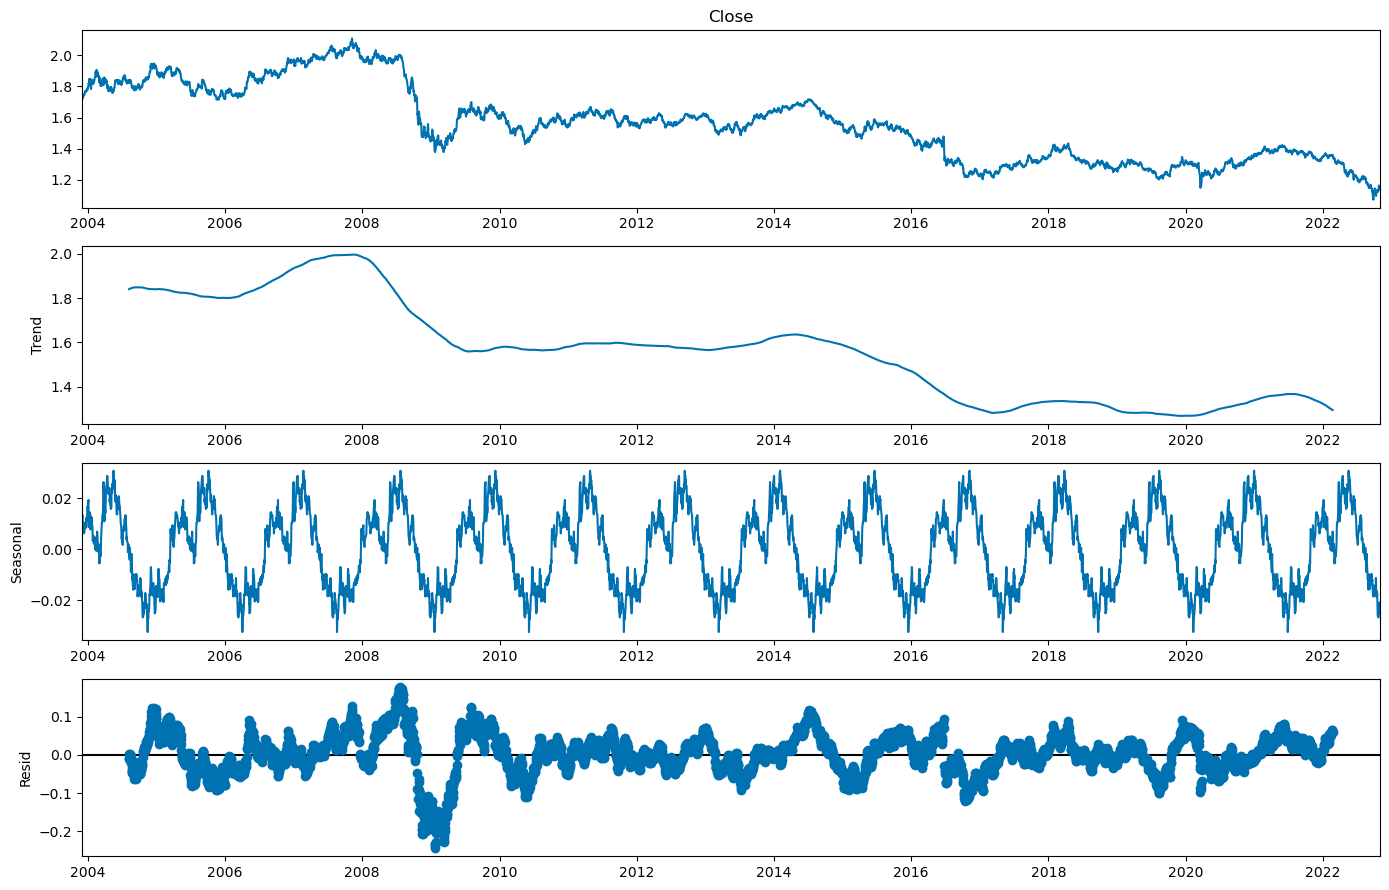

In [8]:
print('The mean of GBP/USD exchange is: ' , gbpusd.Close.mean())
res = sm.tsa.seasonal_decompose(gbpusd.Close, period=360)
resplot = res.plot()

resplot.set_size_inches((14,9))
resplot.tight_layout()

The mean of EUR/GBP exchange between 1 Jan, 2000 - 31 Oct, 2022 is:  0.7795596486402183


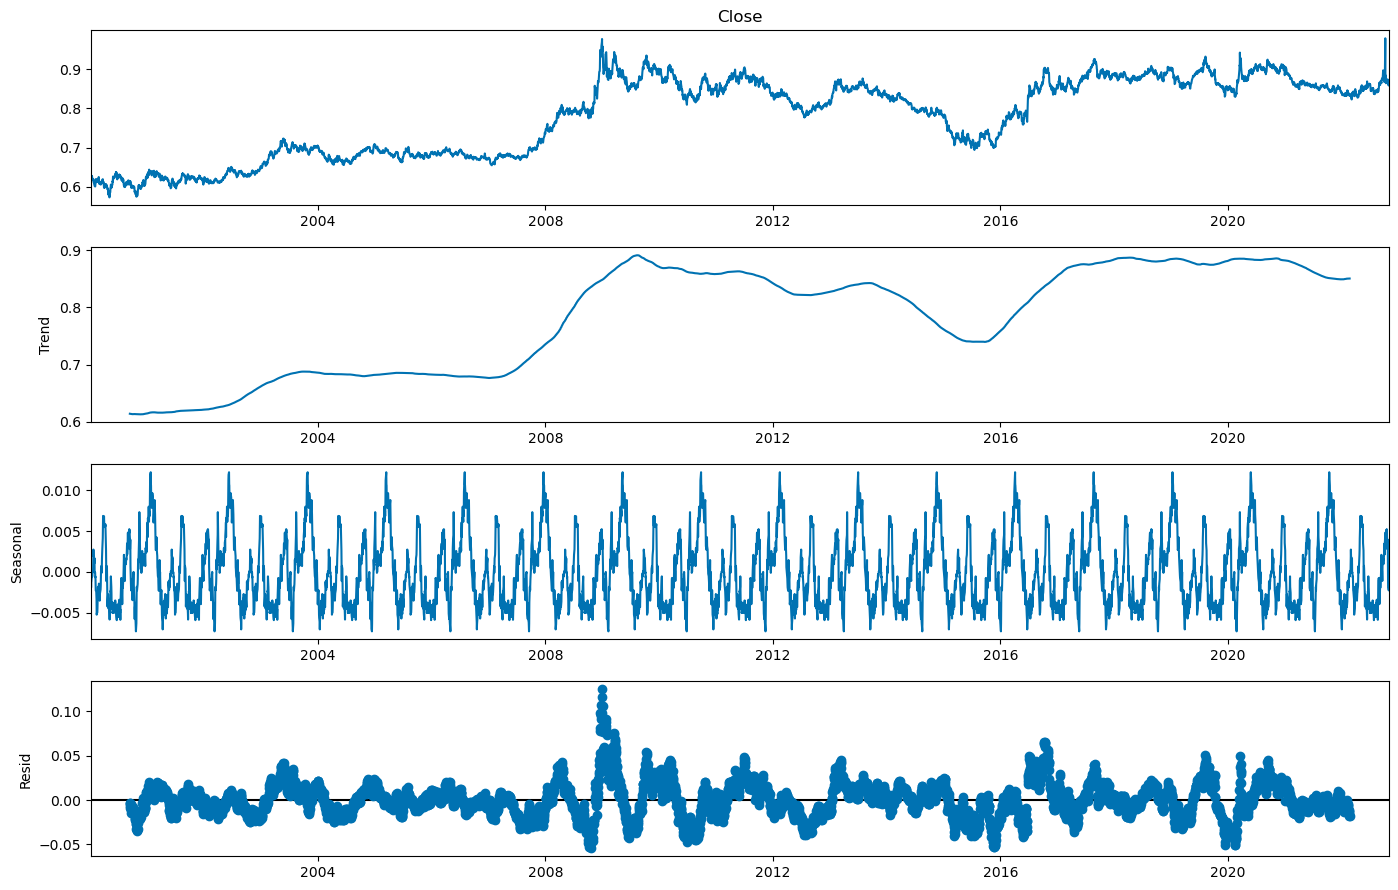

In [9]:
print('The mean of EUR/GBP exchange between 1 Jan, 2000 - 31 Oct, 2022 is: ' , eurgbp.Close.mean())
res = sm.tsa.seasonal_decompose(eurgbp.Close, period=360)
resplot = res.plot()

resplot.set_size_inches((14,9))
resplot.tight_layout()

The mean of GBP/JPY exchange between 1 Jan, 2000 - 31 Oct, 2022 is:  164.1097712512911


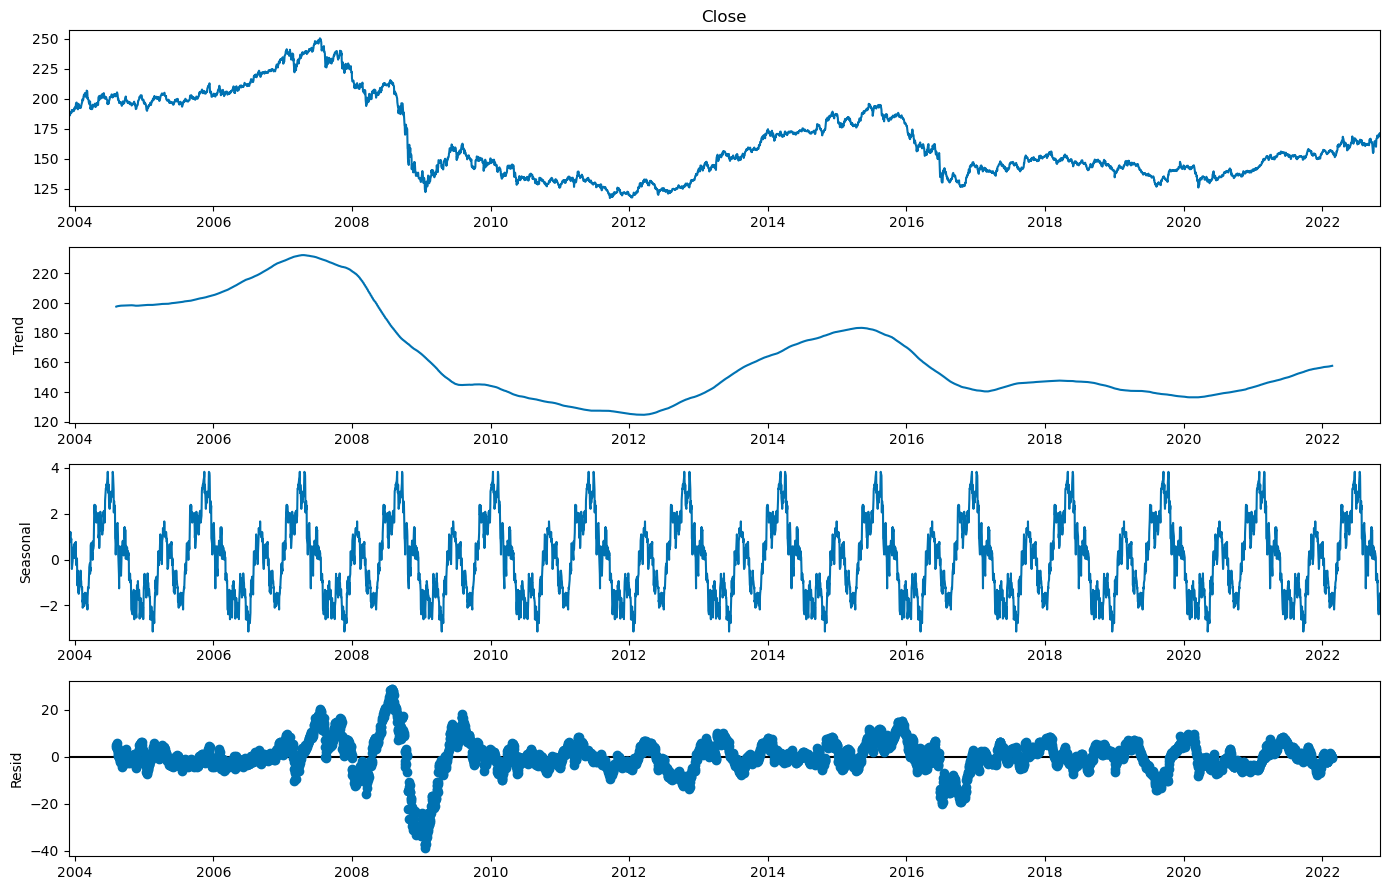

In [10]:
print('The mean of GBP/JPY exchange between 1 Jan, 2000 - 31 Oct, 2022 is: ' , gbpjpy.Close.mean())
res = sm.tsa.seasonal_decompose(gbpjpy.Close, period=360)
resplot = res.plot()

resplot.set_size_inches((14,9))
resplot.tight_layout()

The mean of GBP/USD exchange since Brexit is:  1.3384293494184831


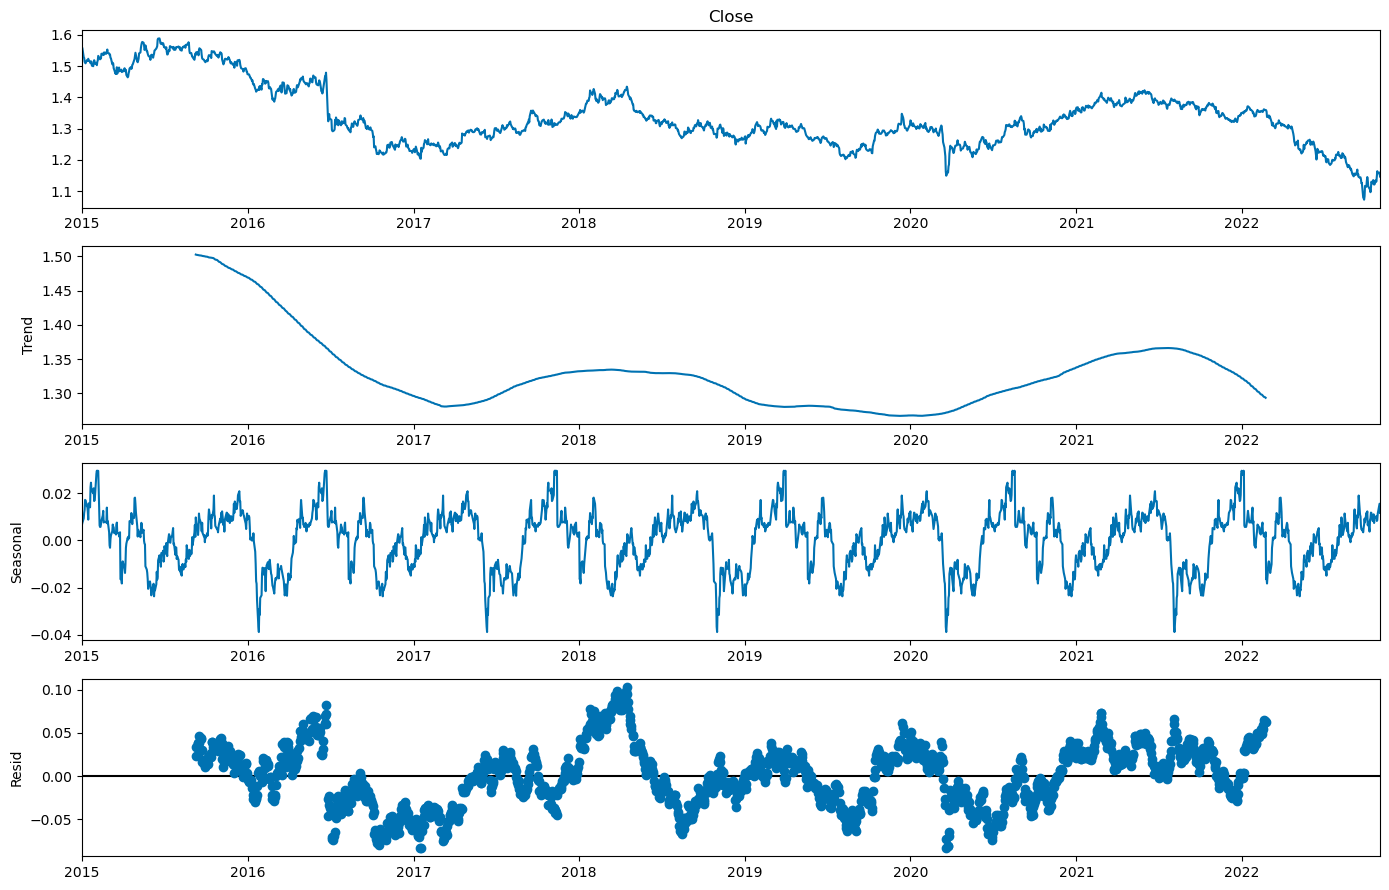

In [11]:
print('The mean of GBP/USD exchange since Brexit is: ' , gbp_brexit.Close.mean())
res = sm.tsa.seasonal_decompose(gbp_brexit.Close, period=360)
resplot = res.plot()

resplot.set_size_inches((14,9))
resplot.tight_layout()

# Plotting shocks in GBP/USD rate 

In [12]:
crisis_2008 = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2007, 1, 1),
                   end=datetime(2010, 12, 31),
                   )

crisis_2008['Currency'] = 'GBP'

In [13]:
crisis_2008.to_csv('crisis_2008.csv')

The mean of GBP/USD exchange between 1 Jan, 2007 - 31 Dec, 2010 is:  1.7394619483302758


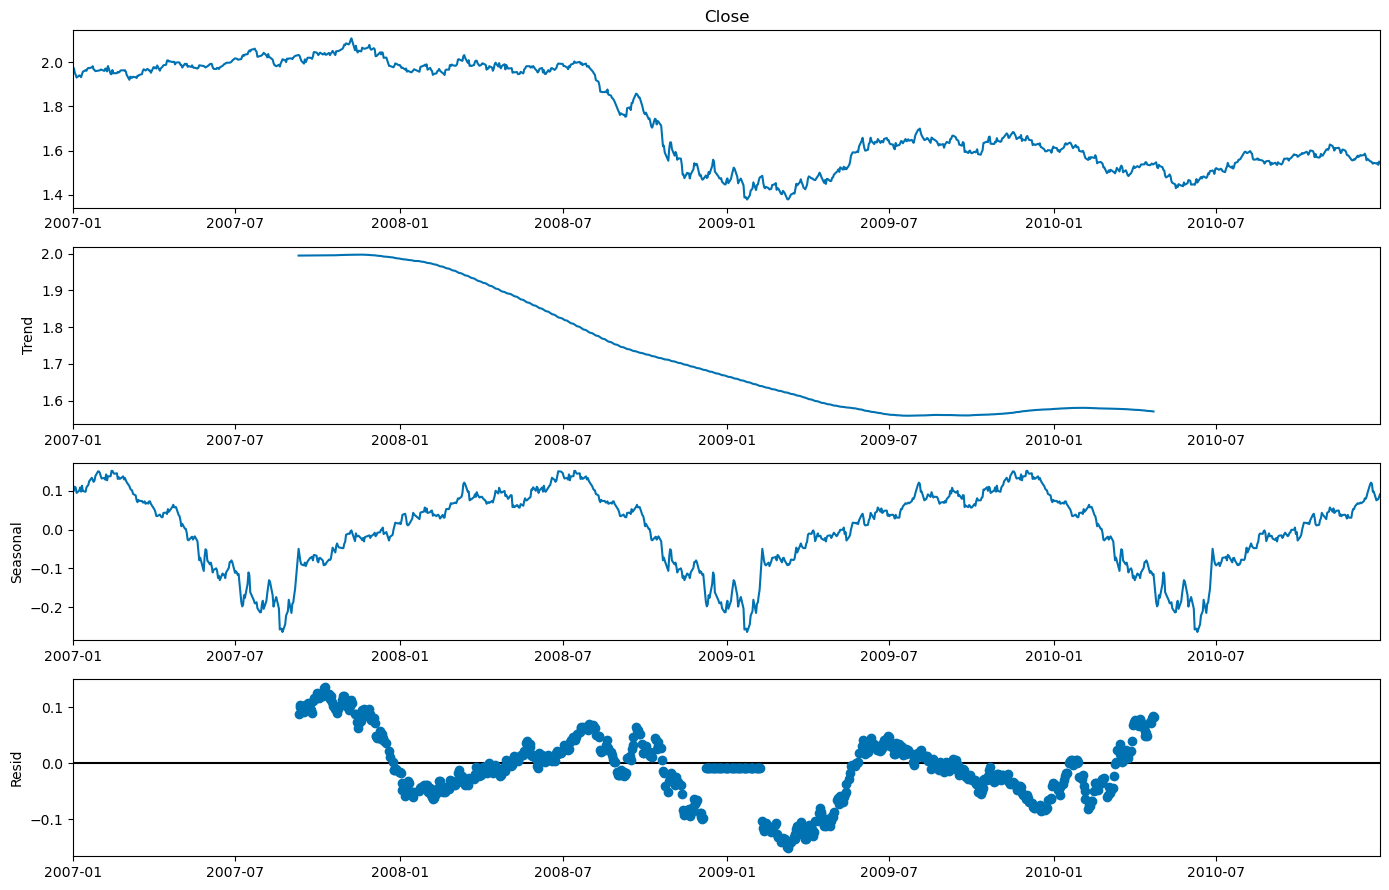

In [14]:
print('The mean of GBP/USD exchange between 1 Jan, 2007 - 31 Dec, 2010 is: ' , crisis_2008.Close.mean())
res = sm.tsa.seasonal_decompose(crisis_2008.Close, period=360)
resplot = res.plot()

resplot.set_size_inches((14,9))
resplot.tight_layout()

In [18]:
crisis2 = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2007, 1, 1),
                   end=datetime(2009, 12, 31),
                   )

crisis2['Currency'] = 'GBP'

In [19]:
crisis2.to_csv('world_financial_crisis_2006_2009.csv')

The mean of GBP/USD exchange between 1 Jan, 2006 - 31 Dec, 2009 is:  1.804491097388729


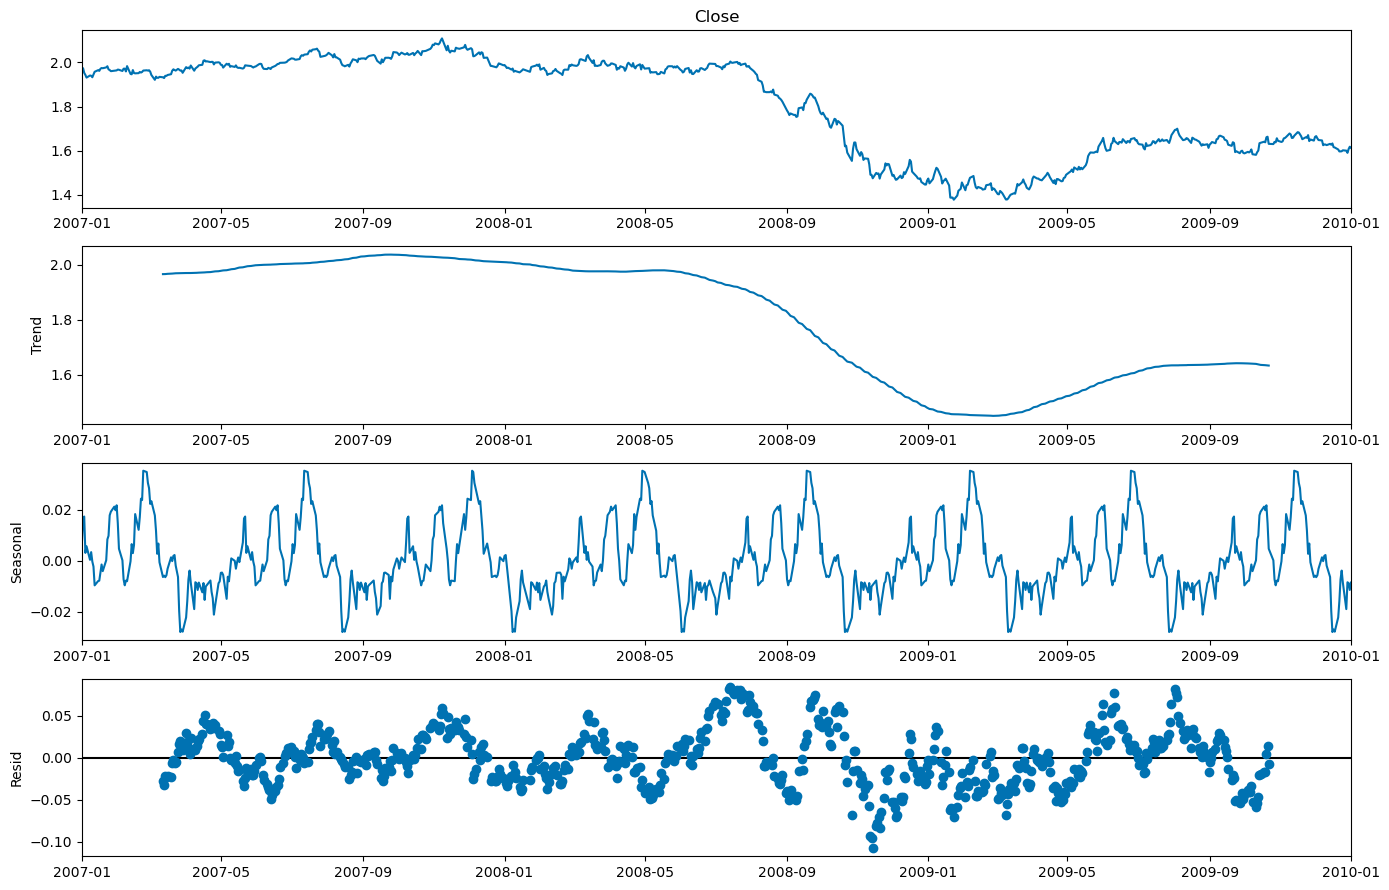

In [20]:
print('The mean of GBP/USD exchange between 1 Jan, 2006 - 31 Dec, 2009 is: ' , crisis2.Close.mean())
res = sm.tsa.seasonal_decompose(crisis2.Close, period=100)
resplot = res.plot()

resplot.set_size_inches((14,9))
resplot.tight_layout()

# Plotting Covid related exchange rate

In [7]:
gbpusd_covid  = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2019, 1, 1),
                   end=datetime(2020, 12, 31),
                   )

gbpusd_covid['Currency'] = 'GBP'

In [9]:
gbpusd_covid

,High,Low,Open,Close,Volume,Adj Close,Currency
Date,,,,,,,
2019-01-01,1.275673,1.271456,1.275022,1.273804,0.0,1.273804,GBP
2019-01-02,1.277335,1.258463,1.275234,1.275429,0.0,1.275429,GBP
2019-01-03,1.263823,1.251878,1.251878,1.252191,0.0,1.252191,GBP
2019-01-04,1.273966,1.261782,1.262897,1.262881,0.0,1.262881,GBP
2019-01-07,1.278772,1.272426,1.273285,1.273496,0.0,1.273496,GBP
...,...,...,...,...,...,...,...
2020-12-28,1.357773,1.343598,1.357368,1.357239,0.0,1.357239,GBP
2020-12-29,1.352064,1.346185,1.346566,1.346602,0.0,1.346602,GBP
2020-12-30,1.361748,1.349455,1.349764,1.349990,0.0,1.349990,GBP


In [22]:
covid_shock.to_csv('gbpusd_19_jan_20_dec.csv')

The mean of GBP/USD exchange between 1 Jan, 2019 - 31 Dec, 2020 is:  1.2806344342277338


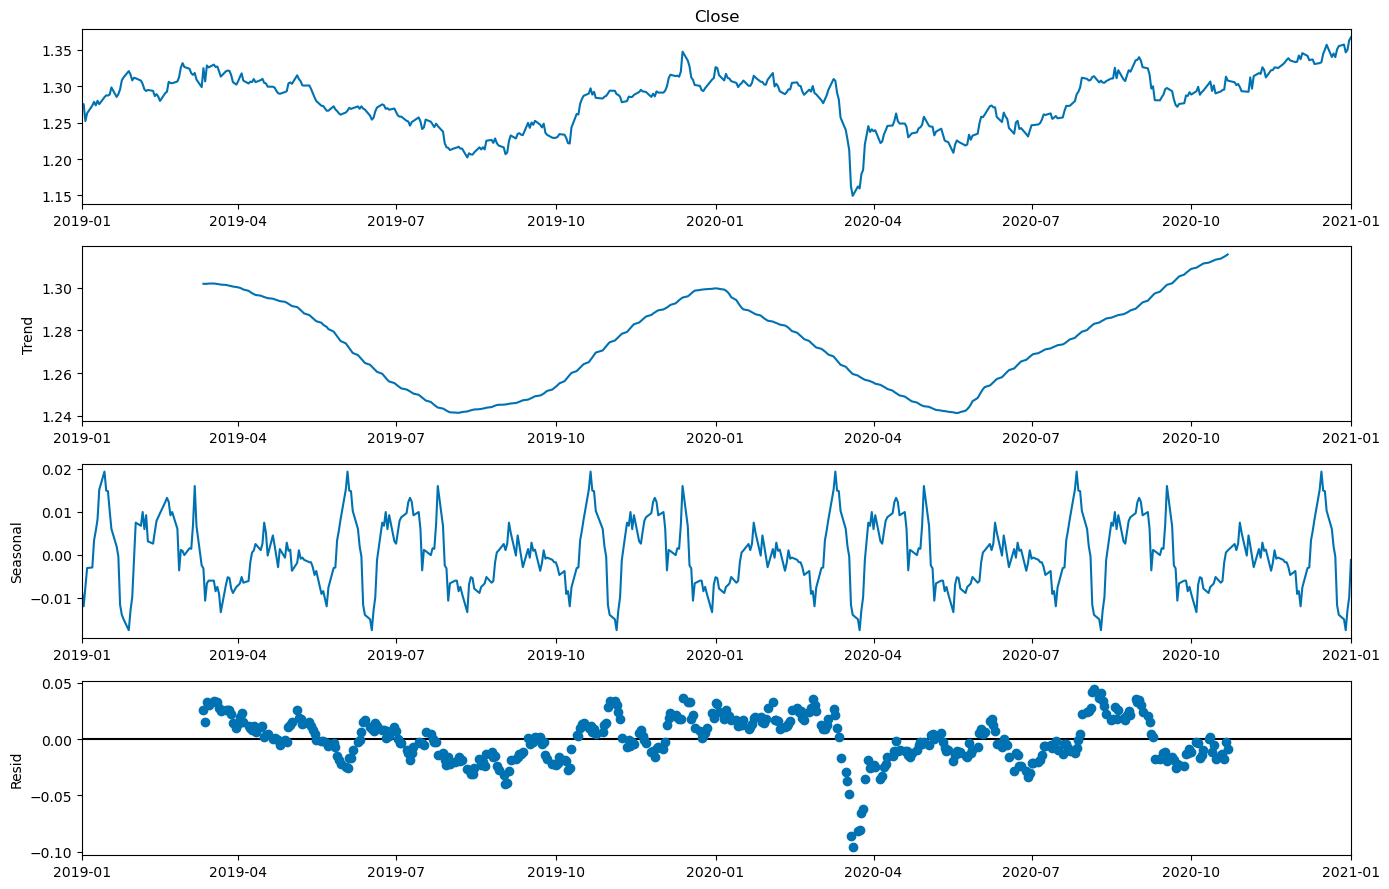

In [23]:
print('The mean of GBP/USD exchange between 1 Jan, 2019 - 31 Dec, 2020 is: ' , covid_shock.Close.mean())
res = sm.tsa.seasonal_decompose(covid_shock.Close, period=100)
resplot = res.plot()

resplot.set_size_inches((14,9))
resplot.tight_layout()

In [25]:
shock_zoom = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2020, 2, 1),
                   end=datetime(2020, 8, 31),
                   )

shock_zoom['Currency'] = 'GBP'

The mean of GBP/USD exchange between 1 Feb, 2020 - 31 Aug, 2020 is:  1.262657469040469


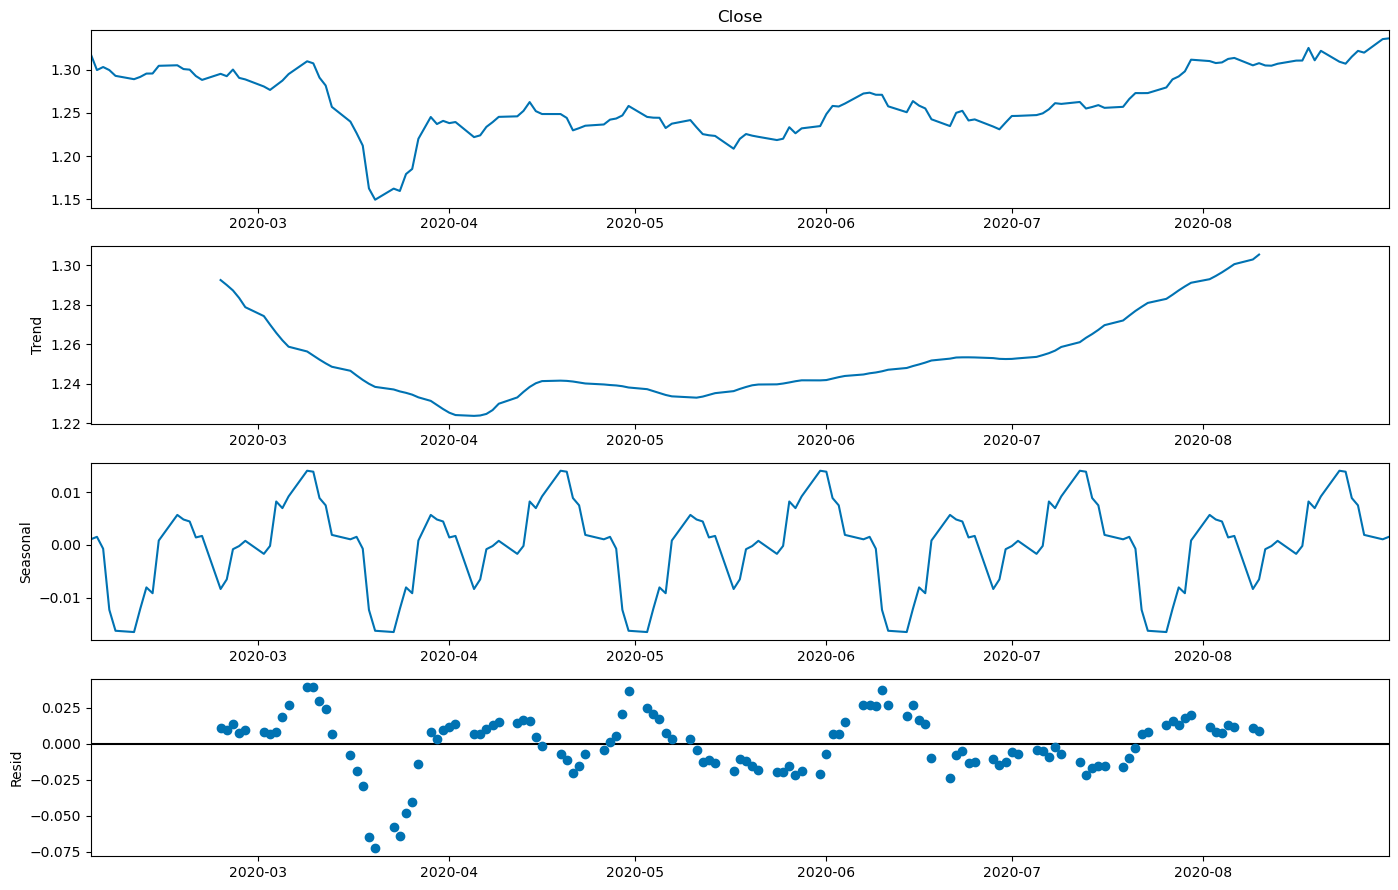

In [26]:
print('The mean of GBP/USD exchange between 1 Feb, 2020 - 31 Aug, 2020 is: ' , shock_zoom.Close.mean())
res = sm.tsa.seasonal_decompose(shock_zoom.Close, period=30)
resplot = res.plot()

resplot.set_size_inches((14,9))
resplot.tight_layout()